# Project Milestone 2 - Matea

This notebook contians initial data exploration and analysis for the Project Milestone 2
____________________________

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
data_path = "./data/"
movie_path = data_path + "movie.metadata.tsv"
character_path = data_path + "character.metadata.tsv"
plot_path = data_path + "plot_summaries.txt"
name_path = data_path + "name.clusters.txt"

In [3]:
columns_movies = [
    "wikipedia_movie_ID",
    "freebase_movie_ID",
    "movie_name",
    "movie_release_date",
    "movie_box_office_revenue",
    "movie_runtime",
    "movie_languages",
    "movie_countries",
    "movie_genres",
]

In [4]:
movies = pd.read_csv(movie_path, sep="\t", names=columns_movies, header=None)
movies.head()

,wikipedia_movie_ID,freebase_movie_ID,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [5]:
# print percentage of nan values in each column
print(movies.isna().sum() / len(movies))

wikipedia_movie_ID          0.000000
freebase_movie_ID           0.000000
movie_name                  0.000000
movie_release_date          0.084437
movie_box_office_revenue    0.897224
movie_runtime               0.250180
movie_languages             0.000000
movie_countries             0.000000
movie_genres                0.000000
dtype: float64


In [6]:
# since we're mainly interested in the box office revenue, we drop all rows where this value is missing
movies = movies.dropna(subset=["movie_box_office_revenue"])

# also, we want to merge the cmu movies dataset with the imbds dataset on the moevie name, year and runtime
# that's why we need to drop the rows with missing values in these columns as well
movies = movies.dropna(subset=["movie_release_date"])
movies = movies.dropna(subset=["movie_runtime"])

In [7]:
# make a column startYear extracting the year from the release date
movies["year"] = movies["movie_release_date"].str[:4]

In [8]:
print(movies.isna().sum() / len(movies))

wikipedia_movie_ID          0.0
freebase_movie_ID           0.0
movie_name                  0.0
movie_release_date          0.0
movie_box_office_revenue    0.0
movie_runtime               0.0
movie_languages             0.0
movie_countries             0.0
movie_genres                0.0
year                        0.0
dtype: float64


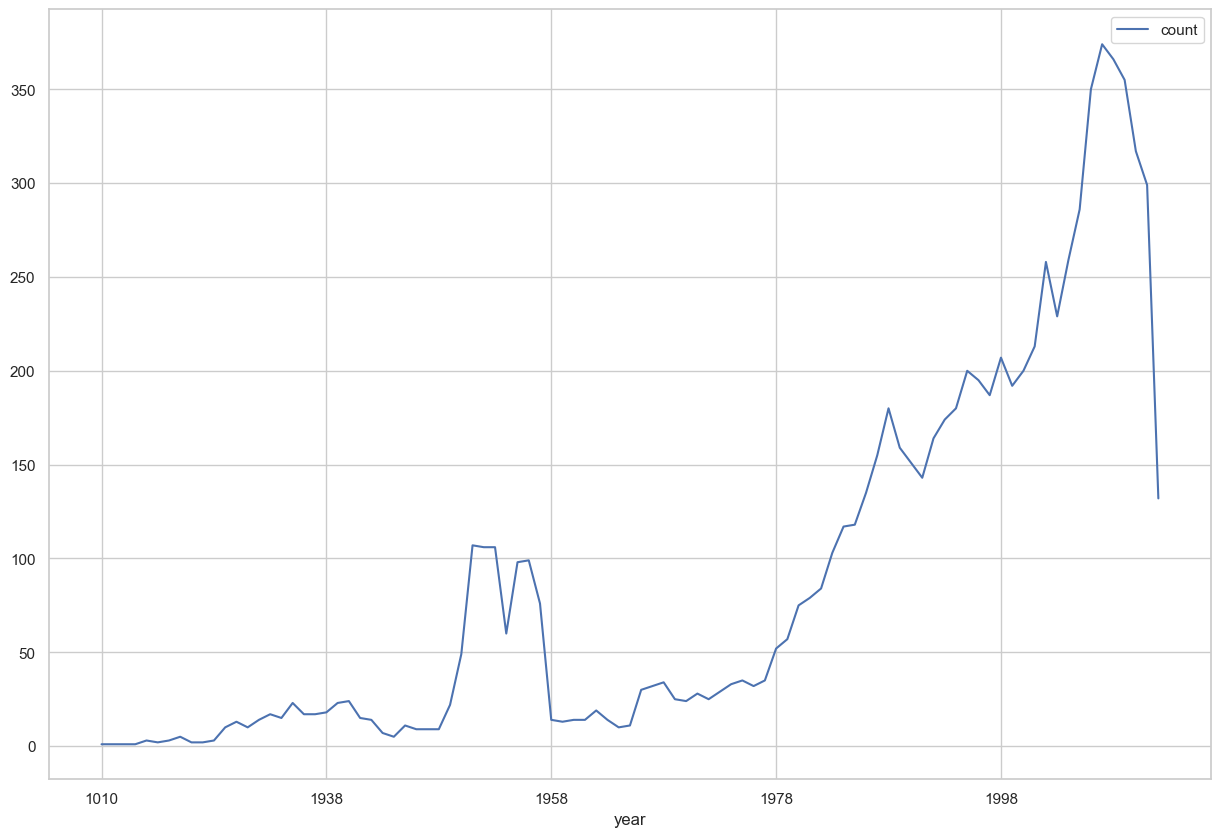

In [25]:
# we want to see how the movies are spread over the years, starting from the min year to the max year in the dataset
# we create a new dataframe with the years and the number of movies released in that year
years = pd.DataFrame(movies["year"].value_counts())
years = years.sort_values(by="year").plot()

In [9]:
ratings_path = data_path + "title.ratings.tsv"
crew_path = data_path + "title.crew.tsv"
basics_path = data_path + "title.basics.tsv"

In [10]:
ratings = pd.read_csv(ratings_path, sep="\t")
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2005
1,tt0000002,5.8,269
2,tt0000003,6.5,1907
3,tt0000004,5.5,178
4,tt0000005,6.2,2687


In [11]:
# crew = pd.read_csv(crew_path, sep="\t")
# crew.head()

In [12]:
basics = pd.read_csv(basics_path, sep="\t")
basics.head()

/var/folders/04/hwxvx8k520b7tgwq_hmhtx7r0000gn/T/ipykernel_26224/1576032434.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  basics = pd.read_csv(basics_path, sep="\t")


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [13]:
print("shape of ratings ", ratings.shape)
# print("size of crew ", crew.shape)
print("shape of basics ", basics.shape)
print("shape of movies ", movies.shape)


shape of ratings  (1366672, 3)
shape of basics  (10290694, 9)
shape of movies  (8243, 10)


In order to merge the movies dataset from cmu with the other datasets from imdb, we need to find the common columns that we will use as keys

First we will merge the ratings and basics dataframes, in order to complete the imdb dataset.
We will use the tconst column as a key, and we will use a right join, because we want to keep all the movies, even if they don't have a rating.

In [14]:
imdb_dataset = pd.merge(ratings, basics, on="tconst", how="right")
imdb_dataset.head()

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,5.7,2005.0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,5.8,269.0,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,6.5,1907.0,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,5.5,178.0,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,6.2,2687.0,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


Next, we will merge the imdb_dataset with the movies dataset. We will use the movie_name, year and movie_runtime columns from the movies dataset and the originalTitle, startYear and runtimeMinutes columns from the imdb_dataset.

But before we do that, we need to check the type of the columns that we will be merging.

In [15]:
print("type of column startYear", type(imdb_dataset["startYear"][0]))
print("type of column year ", type(movies["year"][0]))

print("type of column originalTitle", type(imdb_dataset["originalTitle"][0]))
print("type of column movie_name ", type(movies["movie_name"][0]))

print("type of column runtimeMinutes", type(imdb_dataset["runtimeMinutes"][0]))
print("type of column movie_runtime ", type(movies["movie_runtime"][0]))

type of column startYear <class 'str'>
type of column year  <class 'str'>
type of column originalTitle <class 'str'>
type of column movie_name  <class 'str'>
type of column runtimeMinutes <class 'str'>
type of column movie_runtime  <class 'numpy.float64'>


As we can see the types of 'runtimeMinutes' and 'movie_runtime' are different, so we need to convert them to the same type. We will convert runtimeMinutes to float.

In [16]:
# all values in the runtimeMinutes column that can't be converted to a float will be replaced with NaN.
imdb_dataset['runtimeMinutes'] = pd.to_numeric(imdb_dataset['runtimeMinutes'], errors='coerce')

In [17]:
movies_merged = pd.merge(imdb_dataset, movies, left_on=["originalTitle", "startYear", "runtimeMinutes"], right_on=["movie_name", "year", "movie_runtime"], how="right")

In [18]:
movies_merged

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,...,wikipedia_movie_ID,freebase_movie_ID,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,year
0,tt0228333,4.9,56887.0,movie,Ghosts of Mars,Ghosts of Mars,0,2001,\N,98.0,...,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001
1,tt0029852,6.8,2268.0,movie,Alexander's Ragtime Band,Alexander's Ragtime Band,0,1938,\N,106.0,...,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",1938
2,tt0097499,7.5,31189.0,movie,Henry V,Henry V,0,1989,\N,137.0,...,171005,/m/016ywb,Henry V,1989-11-08,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",1989
3,tt0058331,7.8,181681.0,movie,Mary Poppins,Mary Poppins,0,1964,\N,139.0,...,77856,/m/0kcn7,Mary Poppins,1964-08-27,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",1964
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,612710,/m/02wjqm,New Rose Hotel,1999-10-01,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8241,tt0120514,6.9,17890.0,movie,Wilde,Wilde,0,1997,\N,118.0,...,1191380,/m/04f_y7,Wilde,1997,2158775.0,118.0,"{""/m/02h40lc"": ""English Language""}","{""/m/014tss"": ""Kingdom of Great Britain"", ""/m/...","{""/m/0hn10"": ""LGBT"", ""/m/017fp"": ""Biography"", ...",1997
8242,tt0094898,7.1,218787.0,movie,Coming to America,Coming to America,0,1988,\N,117.0,...,54540,/m/0f7hw,Coming to America,1988-06-29,288752301.0,117.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/03p5xs"": ""...",1988
8243,tt0100666,5.3,3883.0,movie,Spaced Invaders,Spaced Invaders,0,1990,\N,100.0,...,7761830,/m/0kvgqb,Spaced Invaders,1990,15369573.0,100.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3mt0"": ""Alien Film"", ""/m/06n90"": ""Scie...",1990
8244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1918494,/m/0660qx,State and Main,2000-08-26,6944471.0,106.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...","{""/m/0gf28"": ""Parody"", ""/m/09n5t_"": ""Americana...",2000
